#  Stock Market Analysis 



In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [1]:
pip install yfinance

     |████████████████████████████████| 6.4 MB 11.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [3]:
import yfinance as yf
from datetime import datetime

tech_list = ['TSLA','AAPL', 'GOOG', 'MSFT', 'AMZN']

start = '2013-01-02'
end =  '2021-06-30'
# end = datetime.now()
# start = datetime(end.year - 5, end.month, end.day)
for stock in tech_list:
    globals()[stock] = yf.download( stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [4]:
company_list = [TSLA, AAPL, GOOG, MSFT, AMZN ]
company_name = ['TESLA', "APPLE", "GOOGLE", "MICROSOFT", "AMAZON" ]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2013-01-02,7.000,7.090,6.942,7.072,7.072,5974000,TESLA
2013-01-03,7.036,7.090,6.950,6.954,6.954,3710000,TESLA
2013-01-04,6.960,6.960,6.784,6.880,6.880,3370000,TESLA
2013-01-07,6.960,6.960,6.780,6.868,6.868,2210000,TESLA
2013-01-08,6.900,6.900,6.622,6.736,6.736,6420000,TESLA
2013-01-09,6.802,6.838,6.680,6.728,6.728,3490000,TESLA
2013-01-10,6.774,6.798,6.676,6.706,6.706,4612500,TESLA
2013-01-11,6.808,6.808,6.422,6.582,6.582,7816000,TESLA
2013-01-14,6.616,6.676,6.570,6.652,6.652,4625500,TESLA


In [5]:
# Summary Stats
TSLA.loc[:'2020-01-01', :].describe(), TSLA.loc['2020-01-01':, :].describe()

(              Open         High  ...    Adj Close        Volume
 count  1762.000000  1762.000000  ...  1762.000000  1.762000e+03
 mean     47.760555    48.579762  ...    47.773892  3.453849e+07
 std      15.533488    15.740429  ...    15.543354  2.306689e+07
 min       6.616000     6.676000  ...     6.582000  2.201000e+06
 25%      40.428500    41.152499  ...    40.501000  2.003725e+07
 50%      47.278999    48.220999  ...    47.441000  2.877950e+07
 75%      59.798499    60.919998  ...    59.816000  4.146800e+07
 max      87.000000    87.061996  ...    86.188004  1.858195e+08
 
 [8 rows x 6 columns],
              Open        High         Low       Close   Adj Close        Volume
 count  376.000000  376.000000  376.000000  376.000000  376.000000  3.760000e+02
 mean   424.390618  434.661936  413.058133  424.636085  424.636085  6.124636e+07
 std    243.453518  247.774528  238.036734  243.365790  243.365790  3.926376e+07
 min     74.940002   80.972000   70.101997   72.244003   72.244003

In [6]:
# General info
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2013-01-02 to 2021-06-29
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2138 non-null   float64
 1   High          2138 non-null   float64
 2   Low           2138 non-null   float64
 3   Close         2138 non-null   float64
 4   Adj Close     2138 non-null   float64
 5   Volume        2138 non-null   int64  
 6   company_name  2138 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 213.6+ KB


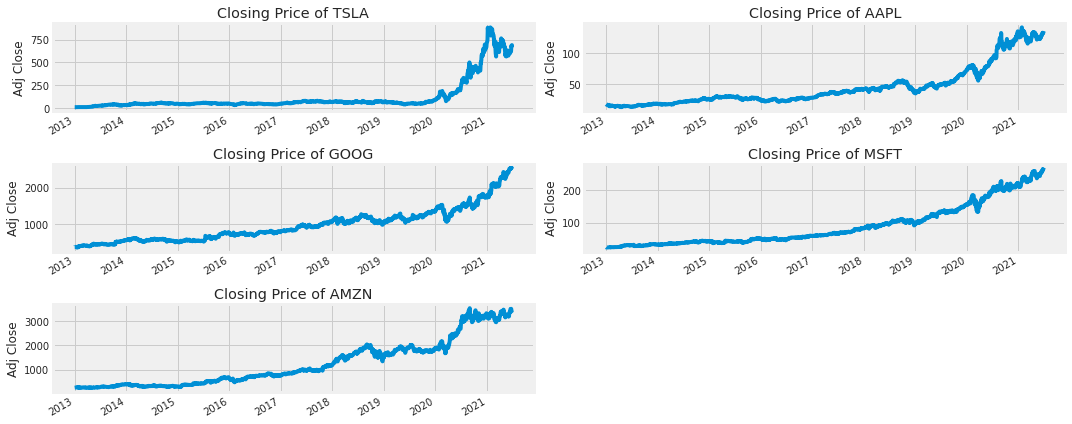

In [7]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

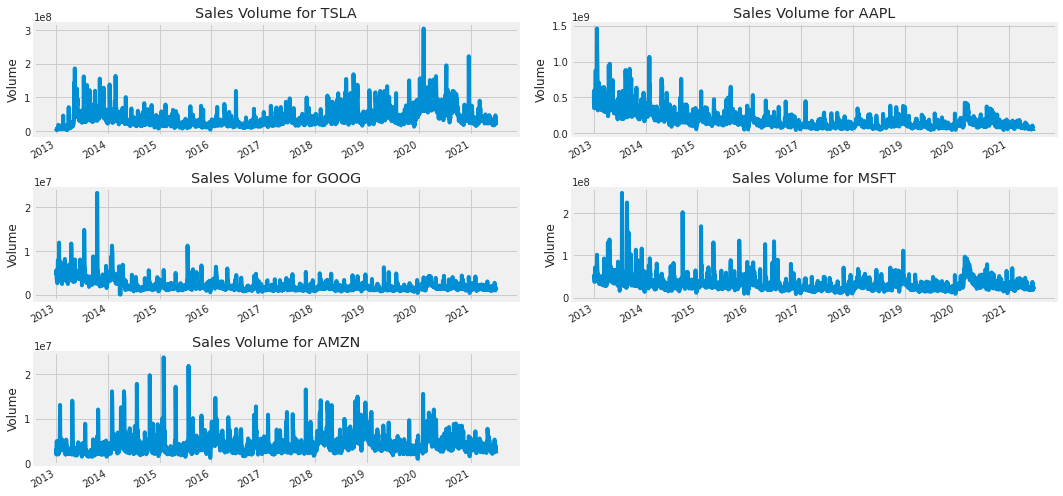

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

Now let's go ahead and plot all the additional Moving Averages

In [10]:
# df.groupby("company_name").hist(figsize=(12, 12));

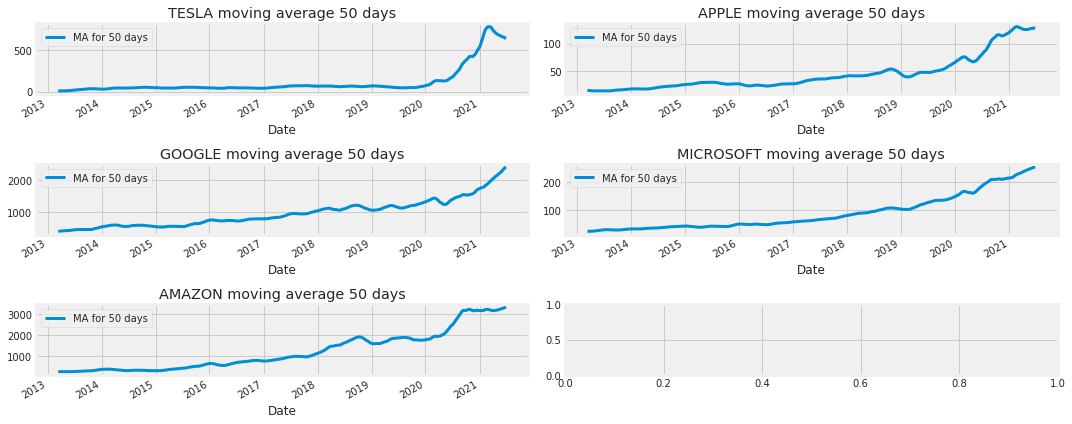

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(6)
fig.set_figwidth(15)

TSLA[['MA for 50 days']].plot(ax=axes[0,0], linewidth=3)
axes[0,0].set_title('TESLA moving average 50 days')

AAPL[['MA for 50 days']].plot(ax=axes[0,1], linewidth=3)
axes[0,1].set_title('APPLE moving average 50 days')


GOOG[['MA for 50 days']].plot(ax=axes[1,0], linewidth=3)
axes[1,0].set_title('GOOGLE moving average 50 days')

MSFT[['MA for 50 days']].plot(ax=axes[1,1], linewidth=3)
axes[1,1].set_title('MICROSOFT moving average 50 days')

AMZN[['MA for 50 days']].plot(ax=axes[2,0], linewidth=3)
axes[2,0].set_title('AMAZON moving average 50 days')



fig.tight_layout()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Tesla stock.

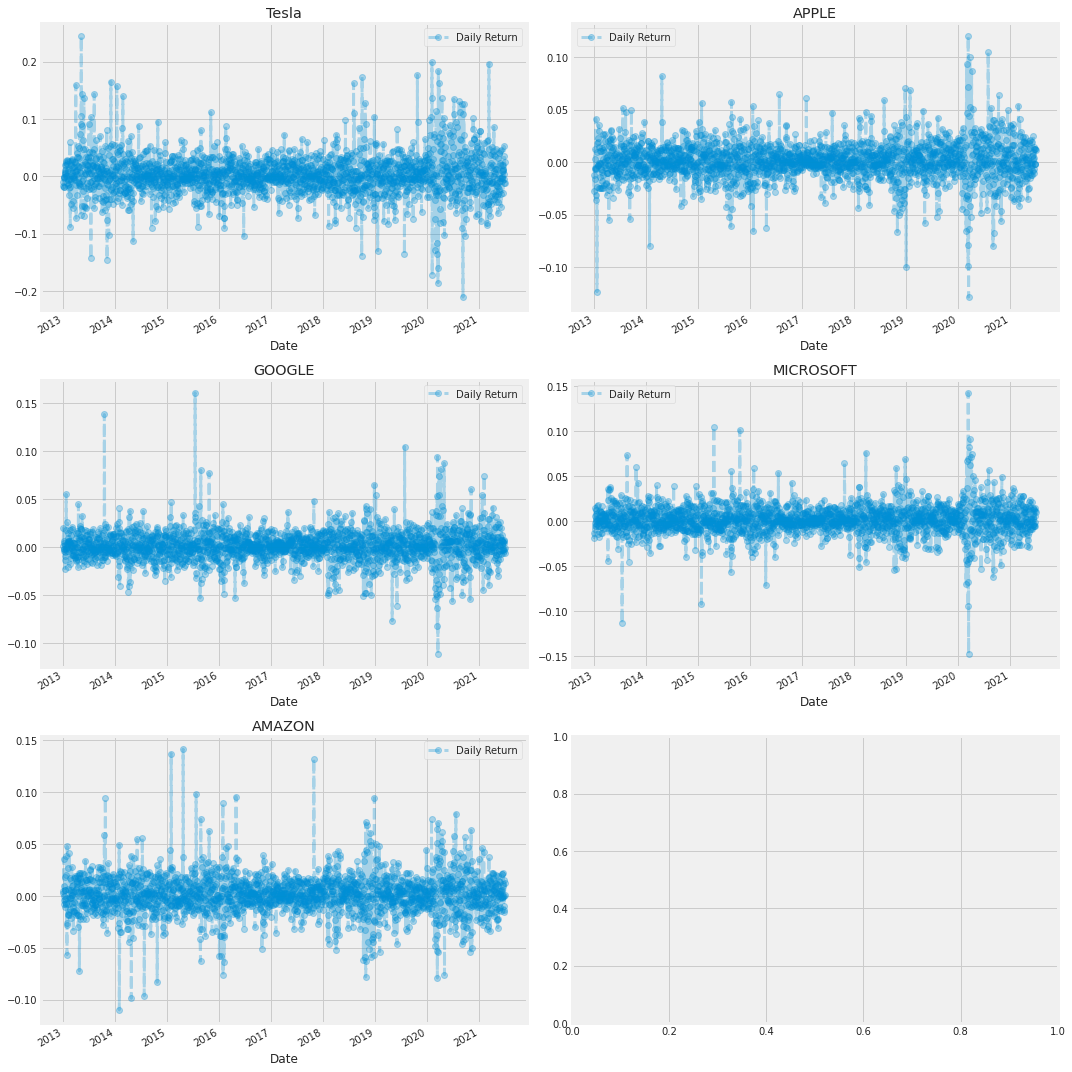

In [12]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

TSLA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[0,0].set_title('Tesla')

AAPL['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[0,1].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[1,0].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[1,1].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o', linewidth=3, alpha=0.3)
axes[2,0].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

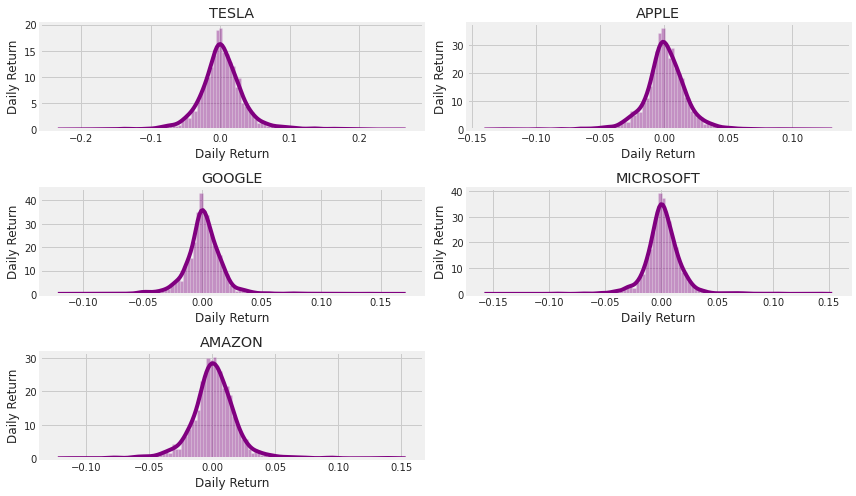

In [13]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(3, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#AAPL['Daily Return'].hist()
plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download (tech_list, start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

[*********************100%***********************]  5 of 5 completed


,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2013-01-02,16.960691,257.309998,360.274597,22.988083,7.072
2013-01-03,16.746611,258.480011,360.483826,22.680141,6.954
2013-01-04,16.280142,259.149994,367.607117,22.255663,6.880
2013-01-07,16.184380,268.459991,366.003143,22.214050,6.868
2013-01-08,16.227930,266.380005,365.280823,22.097527,6.736


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the Tesla stock.

In [15]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT,TSLA
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012622,0.004547,0.000581,-0.013396,-0.016686
2013-01-04,-0.027855,0.002592,0.019760,-0.018716,-0.010641
2013-01-07,-0.005882,0.035925,-0.004363,-0.001870,-0.001744
2013-01-08,0.002691,-0.007748,-0.001974,-0.005245,-0.019220


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


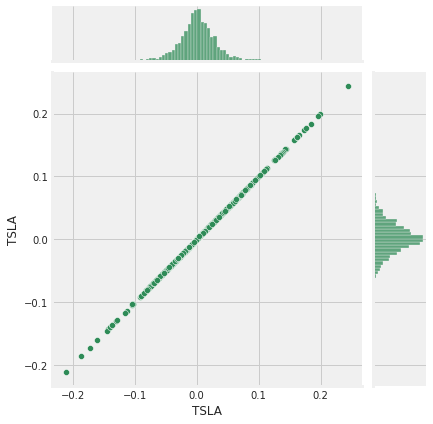

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('TSLA', 'TSLA', tech_rets, kind='scatter', color='seagreen')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


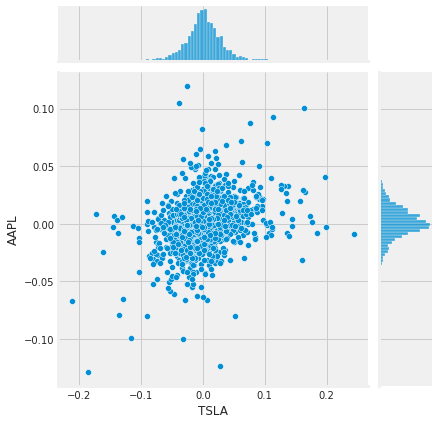

In [17]:
# We'll use joinplot to compare the daily returns of Tesla and Apple
sns.jointplot('TSLA', 'AAPL', tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

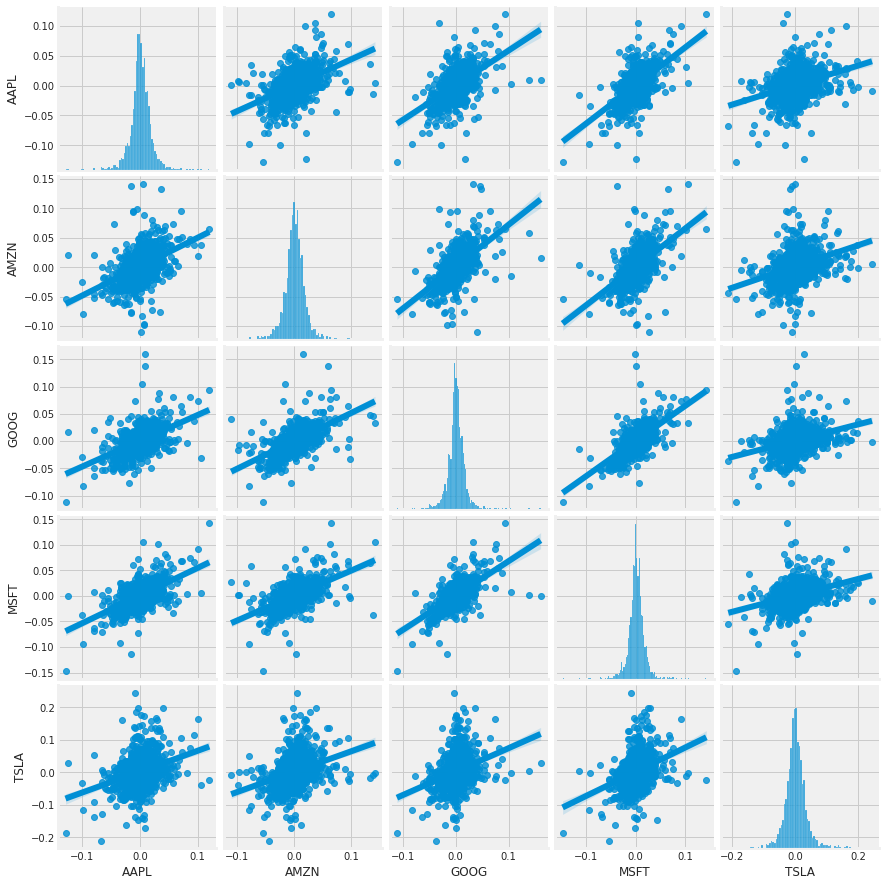

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg');

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Tesla and Apple daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

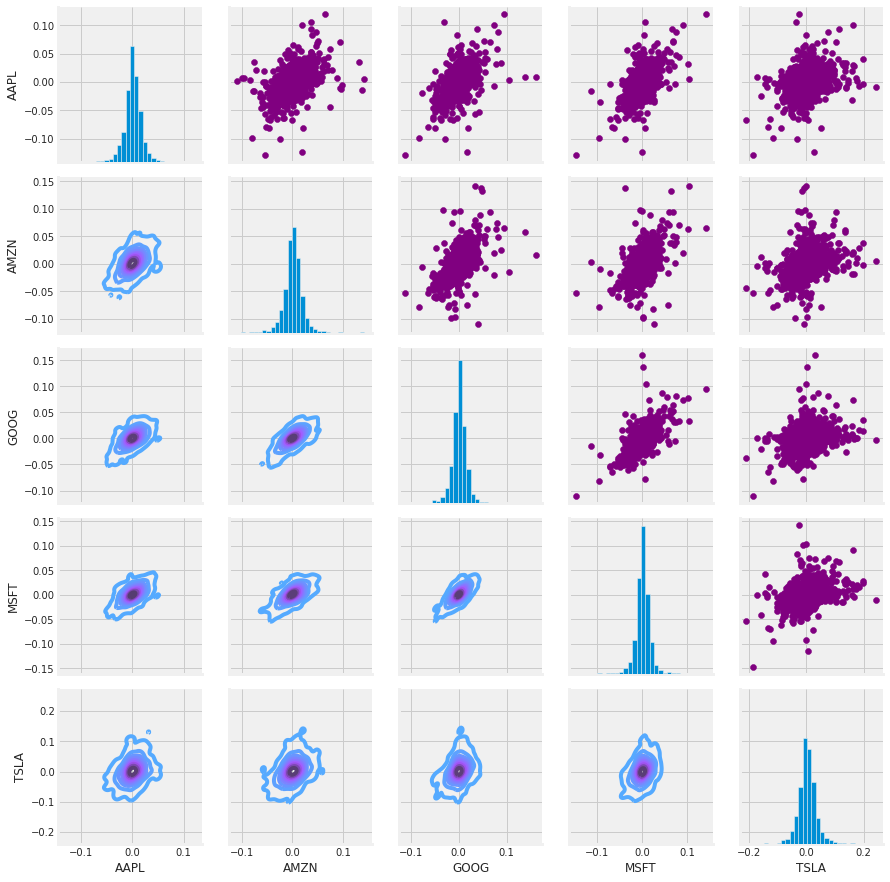

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

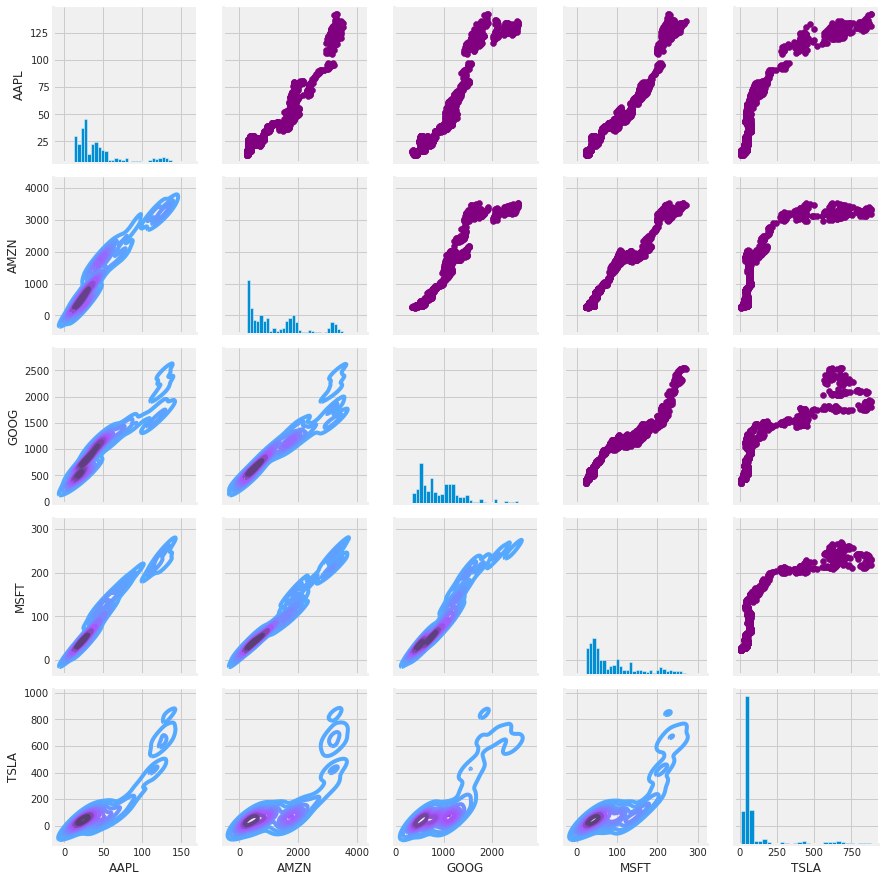

In [20]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

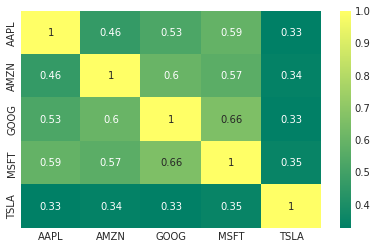

In [21]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

In [22]:
tech_rets.corr()

,AAPL,AMZN,GOOG,MSFT,TSLA
AAPL,1.000000,0.463196,0.525823,0.589282,0.325124
AMZN,0.463196,1.000000,0.604543,0.565529,0.337078
GOOG,0.525823,0.604543,1.000000,0.659420,0.328534
MSFT,0.589282,0.565529,0.659420,1.000000,0.346491
TSLA,0.325124,0.337078,0.328534,0.346491,1.000000


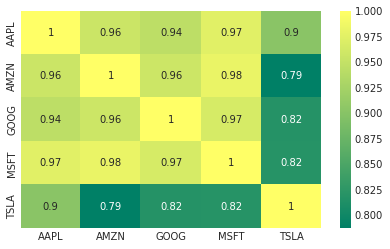

In [23]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

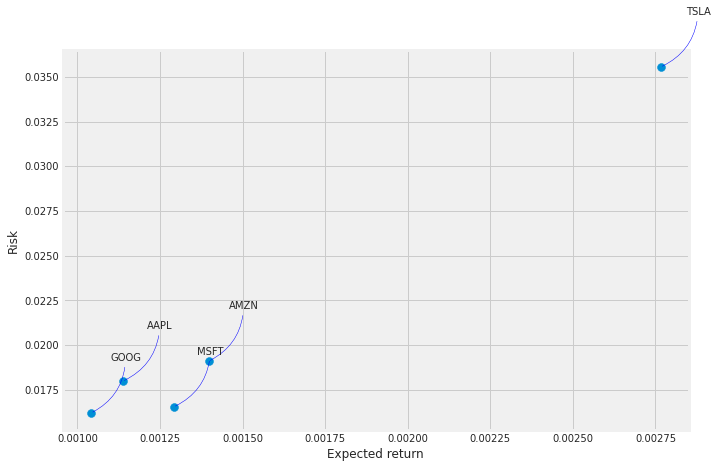

In [24]:
# Let's start by defining a new DataFrame as a clenaed version of the orignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Predicting the closing price stock price of Tesla:

In [25]:
# Get the stock quote
df = yf.download('TSLA', start=start, end=end)

# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,7.000000,7.090000,6.942000,7.072000,7.072000,5974000
2013-01-03,7.036000,7.090000,6.950000,6.954000,6.954000,3710000
2013-01-04,6.960000,6.960000,6.784000,6.880000,6.880000,3370000
2013-01-07,6.960000,6.960000,6.780000,6.868000,6.868000,2210000
2013-01-08,6.900000,6.900000,6.622000,6.736000,6.736000,6420000
...,...,...,...,...,...,...
2021-06-23,632.000000,657.200012,630.039978,656.570007,656.570007,31099200
2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700


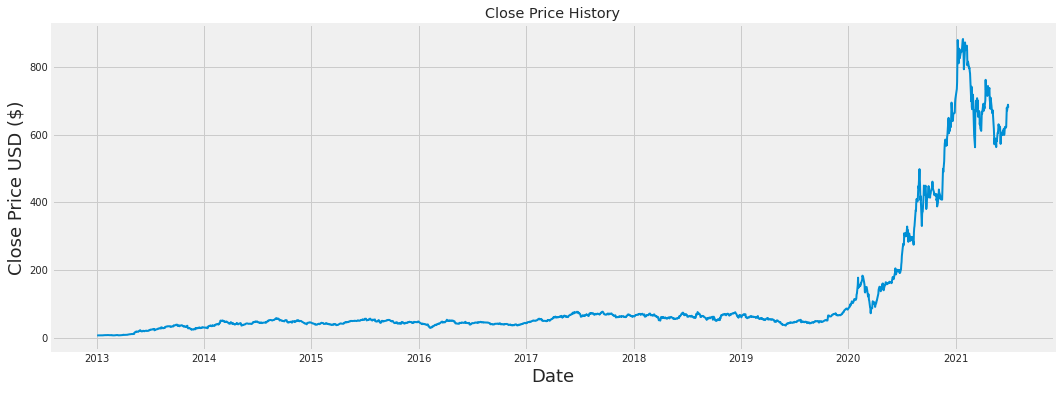

In [26]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'], linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [27]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2032

In [28]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[5.59036806e-04],
       [4.24411649e-04],
       [3.39985860e-04],
       ...,
       [7.59020996e-01],
       [7.78244979e-01],
       [7.69163532e-01]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i-5, 0])
    y_train.append(train_data[i-5:i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
# x_train.shape

In [30]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(5))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 55, 128)           66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 5)                 130       
                                                                 
Total params: 117,723
Trainable params: 117,723
Non-trainable params: 0
_________________________________________________________________
1972/1972 [==============================] - 62s 30ms/step - loss: 0.0019


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i-5, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))


mae = np.sum(np.mean(np.abs(predictions - y_test)))
print(rmse, mae)

108.16579875035305 95.63002975751769


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


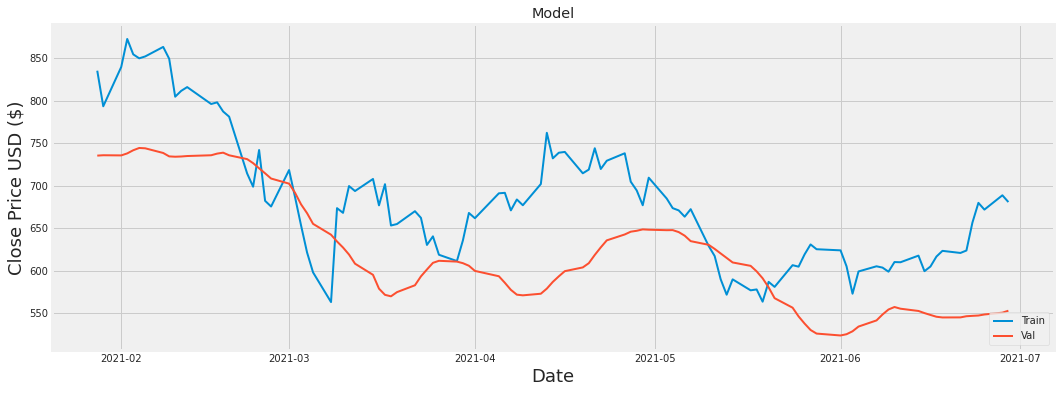

In [34]:
# Plot the data
train = data.iloc[:training_data_len]
valid = data.iloc[training_data_len:]
valid['Predictions'] = predictions[:, 4]
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
# plt.plot(train['Close'], linewidth=2)
plt.plot(valid[['Close', 'Predictions']], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

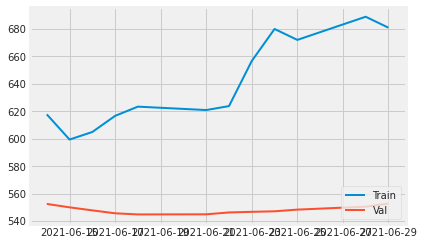

In [41]:
# Show the valid and predicted prices


plt.plot(valid[['Close', 'Predictions']].iloc[-12:], linewidth=2)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()